# Install Modules

In [466]:
!pip install mlxtend
!pip install kneed
!pip install missingno

# Load libraries

In [467]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_pca_correlation_graph
import missingno as msno
import warnings
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
warnings.filterwarnings('ignore')
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
import random
# from google.colab import drive
# Mount drive from Google
# drive.mount('/content/gdrive')

# Define Functions

In [468]:
def acc1(mydf,y1, y2):
    data_crosstab = pd.crosstab(mydf[y1],mydf[y2],margins = False).reset_index()
    data_crosstab = data_crosstab.set_index(y1)
    res = data_crosstab.div(data_crosstab.sum(axis=1), axis=0)
    maxi=res[res.columns].max(axis=1)
    result = round(sum(maxi.values)/len(maxi.values)*100,2)
    return result

def evaluate( table):
    colnam = (table.columns)
    clegend = list(np.unique(table[colnam[0]]))
    rlegend = list(np.unique(table[colnam[1]]))
    N_cols = len(clegend)
    N_rows = len(rlegend)
    Nrowtab = table.shape[0]
    #tablefin =table.sort_values(by=['GroupJanTorsten'])
    obs = pd.DataFrame(np.zeros((N_rows, N_cols)), columns=clegend)
    for index, row in table.iterrows():
        a = row[colnam[1]]
        b = row[colnam[0]]  
        obs[b][a] += 1
    errabs = 0
    for colidx in obs:
        errprc = (1 - obs[colidx].max()/obs[colidx].sum())
        #print(errprc)
        errabs += obs[colidx].sum() -  obs[colidx].max()
        
    #print(obs)
    print('Number of right classifications is '+str(152-errabs)+' from 152, in percent ' + str(1 - errabs/Nrowtab))
    
import pandas as pd

def group_and_percentage(list1, list2):
    groups = {}
    for i in range(len(list1)):
        if list1[i] not in groups:
            groups[list1[i]] = []
        groups[list1[i]].append(list2[i])
    
    result = {}
    total = len(list2)
    for key in groups.keys():
        group_size = len(groups[key])
        group_percentage = round((group_size / total) * 100, 2)
        result[key] = group_percentage
        
    result = dict(sorted(result.items(), key=lambda item: item[1], reverse=True))
    
    return pd.DataFrame(list(result.items()), columns=["Cluster", "Percentage"])


# Load data

In [469]:
# Define main path for data, models and output
root_path = '/Users/gxxdx/Library/CloudStorage/GoogleDrive-gnaviag@unal.edu.co/My Drive/Studies/M2_DBAI_SKEMA/DS2/PoC'
# Set root path as main path
%cd $root_path

# Set data path
data_path = root_path

/Users/gxxdx/Library/CloudStorage/GoogleDrive-gnaviag@unal.edu.co/My Drive/Studies/M2_DBAI_SKEMA/DS2/PoC


In [470]:
df = pd.read_excel(data_path + "/DetailedData - PoC.xls", header = 0)
df

,tiquettesdelignes,EVA51,HD1,LD1,LLD1,LLDC41,LLD_C81,MB1,MDPE1,mLLD1,...,LLD_C83,MB3,MDPE3,mLLD3,mLLD_C43,mLLD_C63,mPEC83,PB3,PP3,GroupJanTorsten
0,114233,0.00,0.0,0.000,0.00,0.000,0.0,0.040,0.00,0.0,...,0.0,0.040,0.00,0.0,0.0,0.0,0.96,0.0,0.0,BF
1,112701,0.68,0.0,0.000,0.30,0.000,0.0,0.020,0.00,0.0,...,0.0,0.000,0.00,0.0,0.0,0.0,0.00,0.0,0.0,BHD
2,103597,0.68,0.0,0.000,0.30,0.000,0.0,0.020,0.00,0.0,...,0.0,0.000,0.00,0.0,0.0,0.0,0.00,0.0,0.0,BHD
3,109938,0.00,0.0,0.150,0.00,0.828,0.0,0.022,0.00,0.0,...,0.0,0.022,0.00,0.0,0.0,0.0,0.00,0.0,0.0,BK
4,110885,0.00,0.0,0.150,0.00,0.832,0.0,0.018,0.00,0.0,...,0.0,0.018,0.00,0.0,0.0,0.0,0.00,0.0,0.0,BK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,108698,0.00,0.0,1.000,0.00,0.000,0.0,0.000,0.00,0.0,...,0.0,0.020,0.00,0.0,0.0,0.0,0.00,0.0,0.0,TPS
148,117658,0.00,0.0,0.673,0.15,0.000,0.0,0.027,0.15,0.0,...,0.0,0.027,0.15,0.0,0.0,0.0,0.00,0.0,0.0,Tube
149,116743,0.00,0.0,0.605,0.00,0.250,0.0,0.045,0.10,0.0,...,0.0,0.045,0.10,0.0,0.0,0.0,0.00,0.0,0.0,Tube
150,109756,0.00,0.0,0.985,0.00,0.000,0.0,0.015,0.00,0.0,...,0.0,0.065,0.00,0.0,0.0,0.0,0.00,0.0,0.0,UKM


In [471]:
random_seed = 1234

# EDA

In [472]:
df.describe()

,tiquettesdelignes,EVA51,HD1,LD1,LLD1,LLDC41,LLD_C81,MB1,MDPE1,mLLD1,...,LLDC43,LLD_C83,MB3,MDPE3,mLLD3,mLLD_C43,mLLD_C63,mPEC83,PB3,PP3
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,...,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,115077.388158,0.011579,0.005592,0.454539,0.054961,0.233184,0.049178,0.023947,0.034539,0.068579,...,0.134875,0.056546,0.026599,0.033882,0.068579,0.034526,0.020579,0.039507,0.003882,0.021250
std,3347.183766,0.080742,0.027925,0.315082,0.138905,0.309208,0.196686,0.013161,0.064652,0.228290,...,0.208983,0.207245,0.014905,0.064490,0.228290,0.147688,0.125827,0.147032,0.016590,0.137173
min,101087.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,114519.500000,0.000000,0.000000,0.150000,0.000000,0.000000,0.000000,0.015000,0.000000,0.000000,...,0.000000,0.000000,0.015000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,116258.500000,0.000000,0.000000,0.570000,0.000000,0.150000,0.000000,0.020000,0.000000,0.000000,...,0.000000,0.000000,0.022000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,117231.750000,0.000000,0.000000,0.755000,0.000000,0.250000,0.000000,0.030000,0.100000,0.000000,...,0.250000,0.000000,0.035000,0.025000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,118183.000000,0.680000,0.150000,1.000000,0.765000,0.835000,0.840000,0.089000,0.350000,0.970000,...,0.832000,0.840000,0.089000,0.350000,0.970000,0.728000,0.810000,0.960000,0.085000,1.000000


In [473]:
df.GroupJanTorsten.nunique()

45

Text(0.5, 1.0, 'Frequencies by Group')

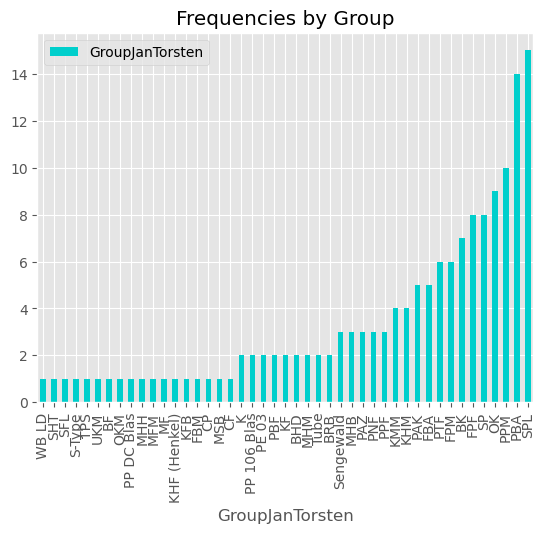

In [474]:
#Frequencies by group

legend = list(np.unique(df.GroupJanTorsten))
data = df['GroupJanTorsten'].value_counts().reset_index().sort_values(by = 'GroupJanTorsten')
data.plot.bar(x='index', y='GroupJanTorsten', color ="#00cfcc") 
plt.xlabel('GroupJanTorsten')
plt.title(r'Frequencies by Group')

# Define parameters

In [475]:
X = df.iloc[:,1:46]
y = df['GroupJanTorsten']

<AxesSubplot:>

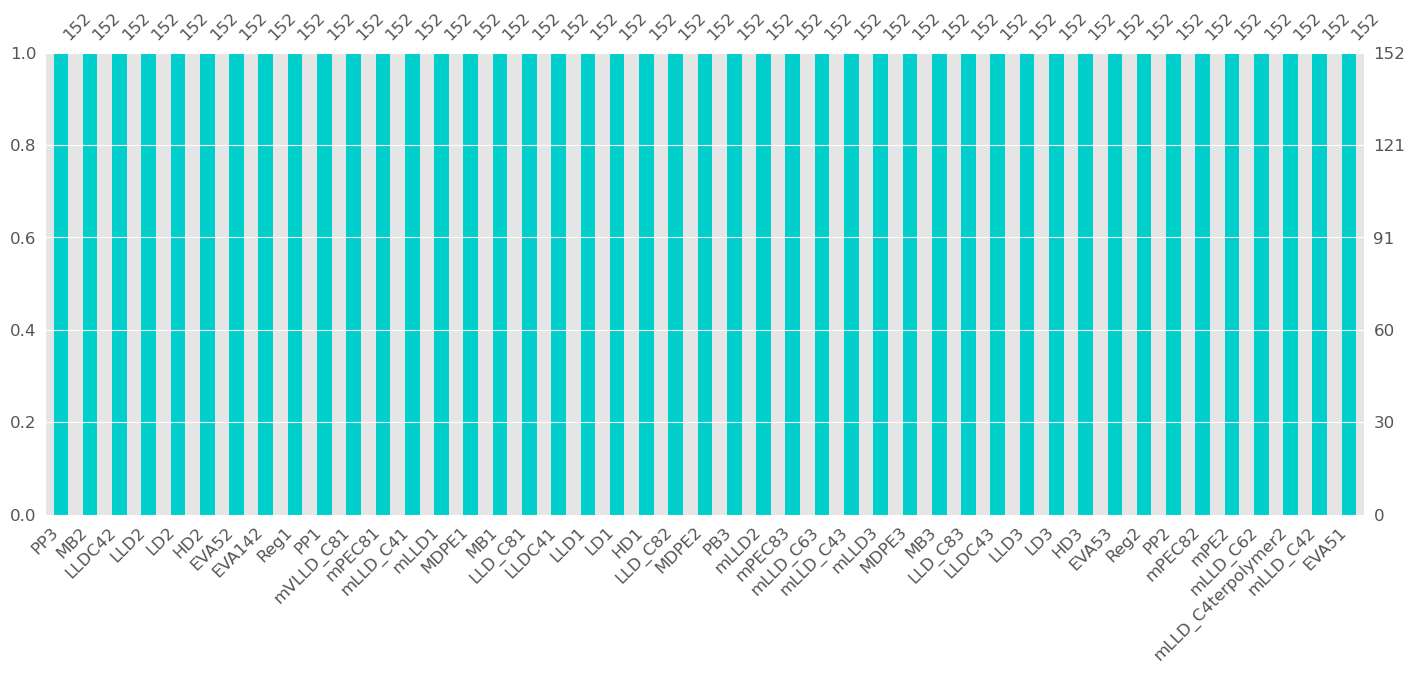

In [476]:
# Bar plot of missing values and percentage
msno.bar(X, labels=True, figsize=(17,6), fontsize=12, sort="descending", color="#00cfcc")

## Correlations

<AxesSubplot:>

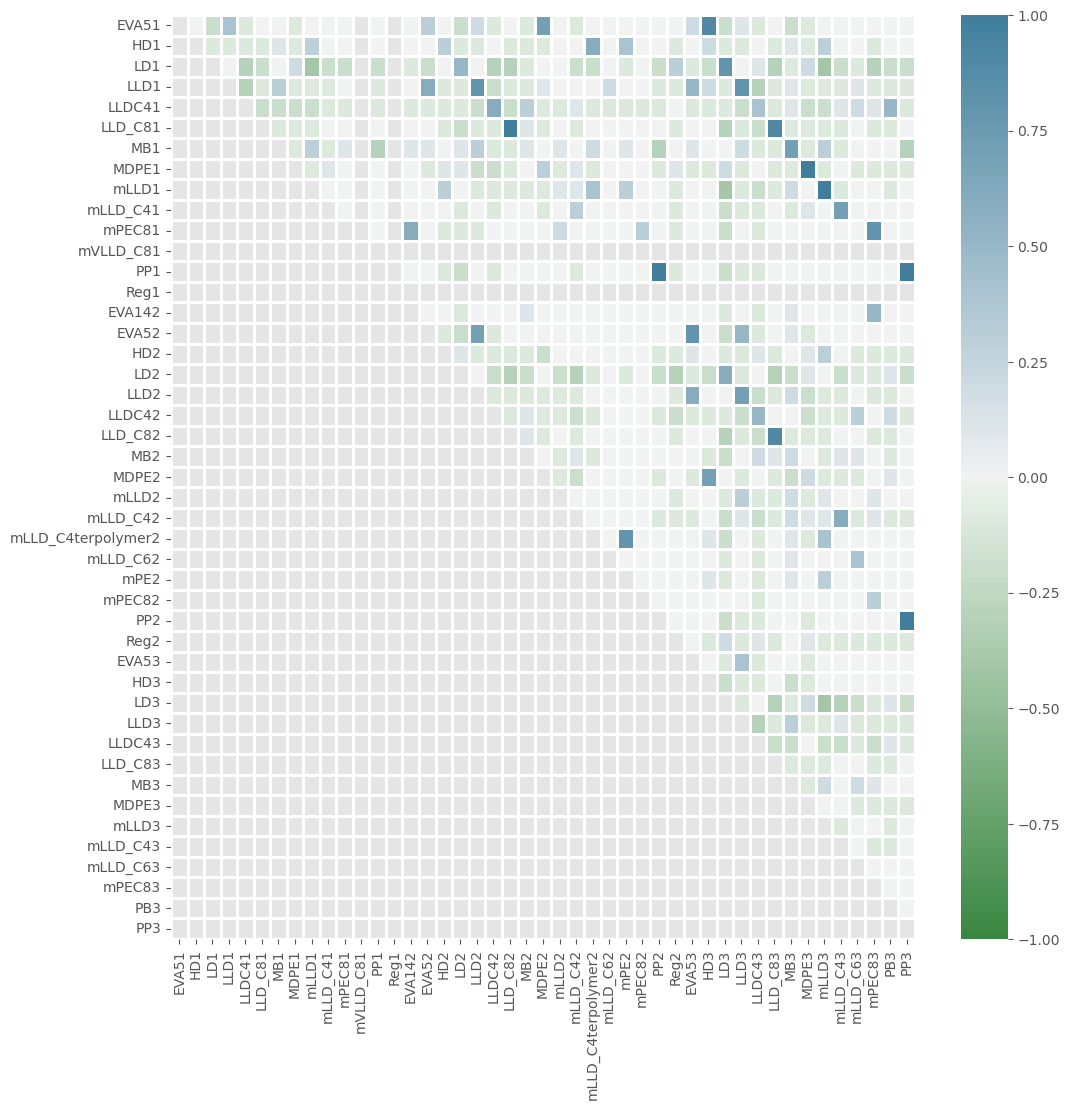

In [477]:
plt.style.use("ggplot")
f, ax = plt.subplots(figsize=(12, 12))
cv= X.corr().round(2)
matrix = np.tril(np.ones_like(cv))
cmap = sns.diverging_palette(130, 230, as_cmap=True)
sns.heatmap(X.corr().round(1),vmin=-1,vmax=1,annot=False,linewidth=.8, mask=matrix, cmap=cmap)

# PCA

0.9247990113407827


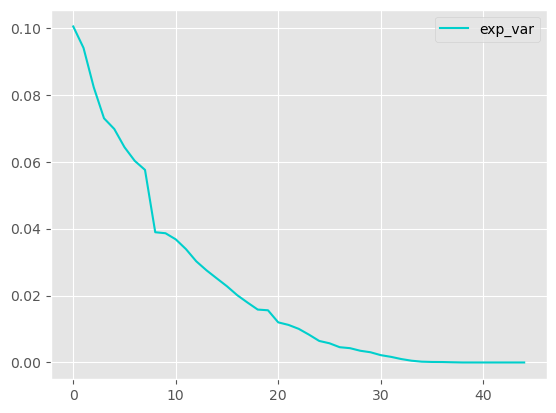

In [478]:
# Define Scaler 
sc = StandardScaler()
features = sc.fit_transform(X)

# Define PCA
pca = PCA()

X1 = pca.fit_transform(features)
explained_variance = pca.explained_variance_ratio_
pd.DataFrame(explained_variance, columns= ['exp_var'])
pd.DataFrame(explained_variance, columns= ['exp_var']).plot.line(color = "#00cfcc")

# Define PCA
pca = PCA(n_components = 20)

features = pd.DataFrame(pca.fit_transform(features), columns = ['c{}'.format(i) for i in range(1, 21)])
explained_variance = pca.explained_variance_ratio_
print(np.sum(explained_variance))

# ONLY ACTIVATE TO USE PCA
X= features
# 20 PC explain about 92% of the variance

# K-Means (Random Inizialization)

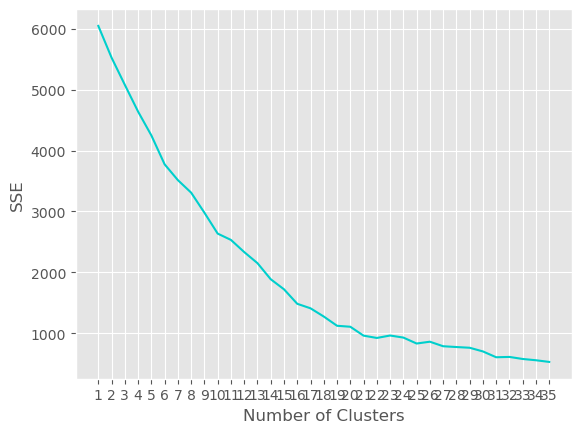


Elbow point : 16

The lowest SSE value: 1599.1588284915313

Silhouette score: 0.33327141142790484

Group-to-cluster ratio : 89.66


,Cluster,Percentage
0,11,22.37
1,14,21.05
2,12,8.55
3,3,7.89
4,10,6.58
5,8,6.58
6,9,5.92
7,13,5.26
8,2,5.26
9,4,2.63


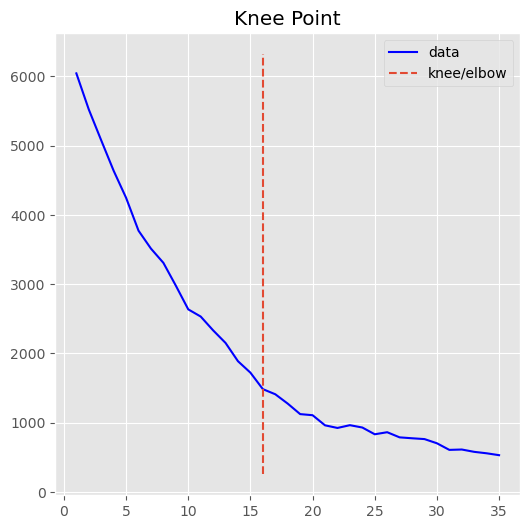

In [479]:
#function to standardize data

X1= X
# kmeans = KMeans(init="random", n_clusters=15, n_init=10, max_iter=300)
# kmeans.fit(X1)
# y_kmeans = kmeans.predict(X1)
# df.loc[:,"df_kmeans"]=y_kmeans
# #df.to_excel('df_kmeans.xlsx', index=False)

#Elbow method
kmeans_kwargs = { "init": "random",  "n_init": 100, "max_iter": 300, "random_state":random_seed}

sse = []
for k in range(1, 36):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X1)
    sse.append(kmeans.inertia_)
    
plt.plot(range(1, 36), sse, color="#00cfcc" )
plt.xticks(range(1, 36))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()   

# identify the elbow point automatically
kl = KneeLocator(range(1, 36), sse, curve="convex", direction="decreasing")
print("\nElbow point :",kl.elbow)
kl.plot_knee()

#We choose K=20  

kmeans = KMeans(init="random", n_clusters=16, n_init=100, max_iter=300)
#kmeans_kwargs = { "init": "random", "n_init": 10, "max_iter": 500, "random_state": random_state}
kmeans.fit(X1)
y_kmeans = kmeans.predict(X1)
df.loc[:,"y_kmeans"]=y_kmeans

# The lowest SSE value
print("\nThe lowest SSE value:",kmeans.inertia_)

# Calculate silhouette_score to make comparissons
score_HC = silhouette_score(X, df.y_kmeans, metric='euclidean')
print("\nSilhouette score:", score_HC)

# Accuracy 
Accura = acc1(df,'GroupJanTorsten','y_kmeans')
print("\nGroup-to-cluster ratio :", Accura)

# Percentage by cluster
group_and_percentage(df['y_kmeans'],df['GroupJanTorsten'])

# K-Means ++

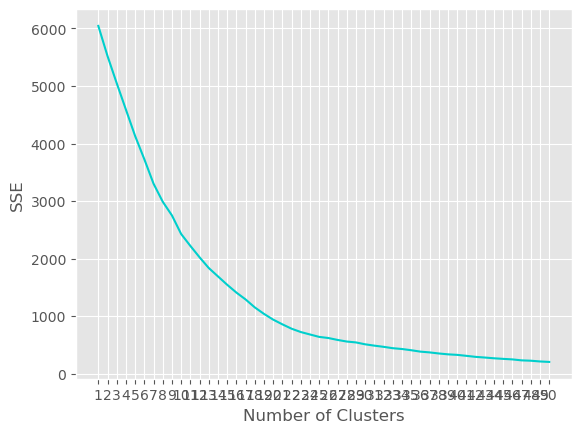


Elbow point : 18

The lowest SSE value: 1159.310651999595

Silhouette score: 0.37172111596640206

Group-to-cluster ratio : 89.36


,Cluster,Percentage
0,3,23.03
1,6,20.39
2,1,7.89
3,9,7.24
4,0,6.58
5,2,5.92
6,8,5.26
7,14,5.26
8,15,5.26
9,16,2.63


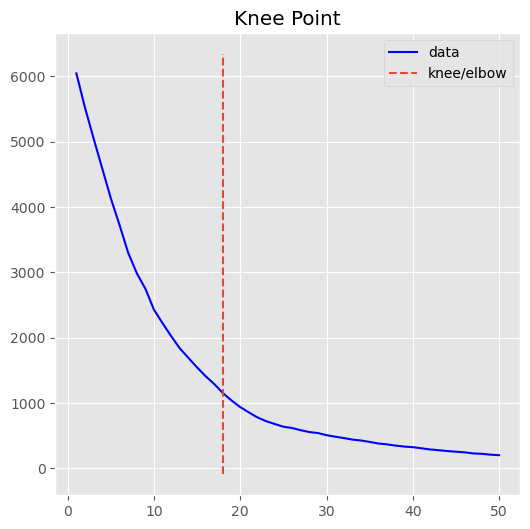

In [480]:
#function to standardize data

# kmeans = KMeans(init="k-means++", n_clusters=15, n_init=10, max_iter=300)
# kmeans.fit(X1)
# y_kmeans = kmeans.predict(X1)
# df.loc[:,"df_kmeans++"]=y_kmeans
# df.to_excel('df_kmeans.xlsx', index=False)

#Elbow method
kmeans_kwargs = { "init": "k-means++",  "n_init": 100, "max_iter": 300, "random_state":random_seed}

sse = []
for k in range(1, 51):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X1)
    sse.append(kmeans.inertia_)
    
plt.plot(range(1, 51), sse, color="#00cfcc")
plt.xticks(range(1, 51))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()   

# identify the elbow point automatically
kl = KneeLocator(range(1, 51), sse, curve="convex", direction="decreasing")
print("\nElbow point :",kl.elbow)
kl.plot_knee()

#We choose K=19  

kmeans = KMeans(init="k-means++", n_clusters=18, n_init=100, max_iter=300)
kmeans.fit(X1)
y_kmeans = kmeans.predict(X1)
df.loc[:,"y_kmeans++"]=y_kmeans

# The lowest SSE value
print("\nThe lowest SSE value:",kmeans.inertia_)


# Calculate silhouette_score to make comparissons
score_HC = silhouette_score(X,df['y_kmeans++'], metric='euclidean')
print("\nSilhouette score:", score_HC)


# Accuracy 
Accura = acc1(df,'GroupJanTorsten','y_kmeans++')
print("\nGroup-to-cluster ratio :", Accura)

# Percentage by cluster
group_and_percentage(df['y_kmeans++'],df['GroupJanTorsten'])

# Hiererachical Tree Clustering (Ward)

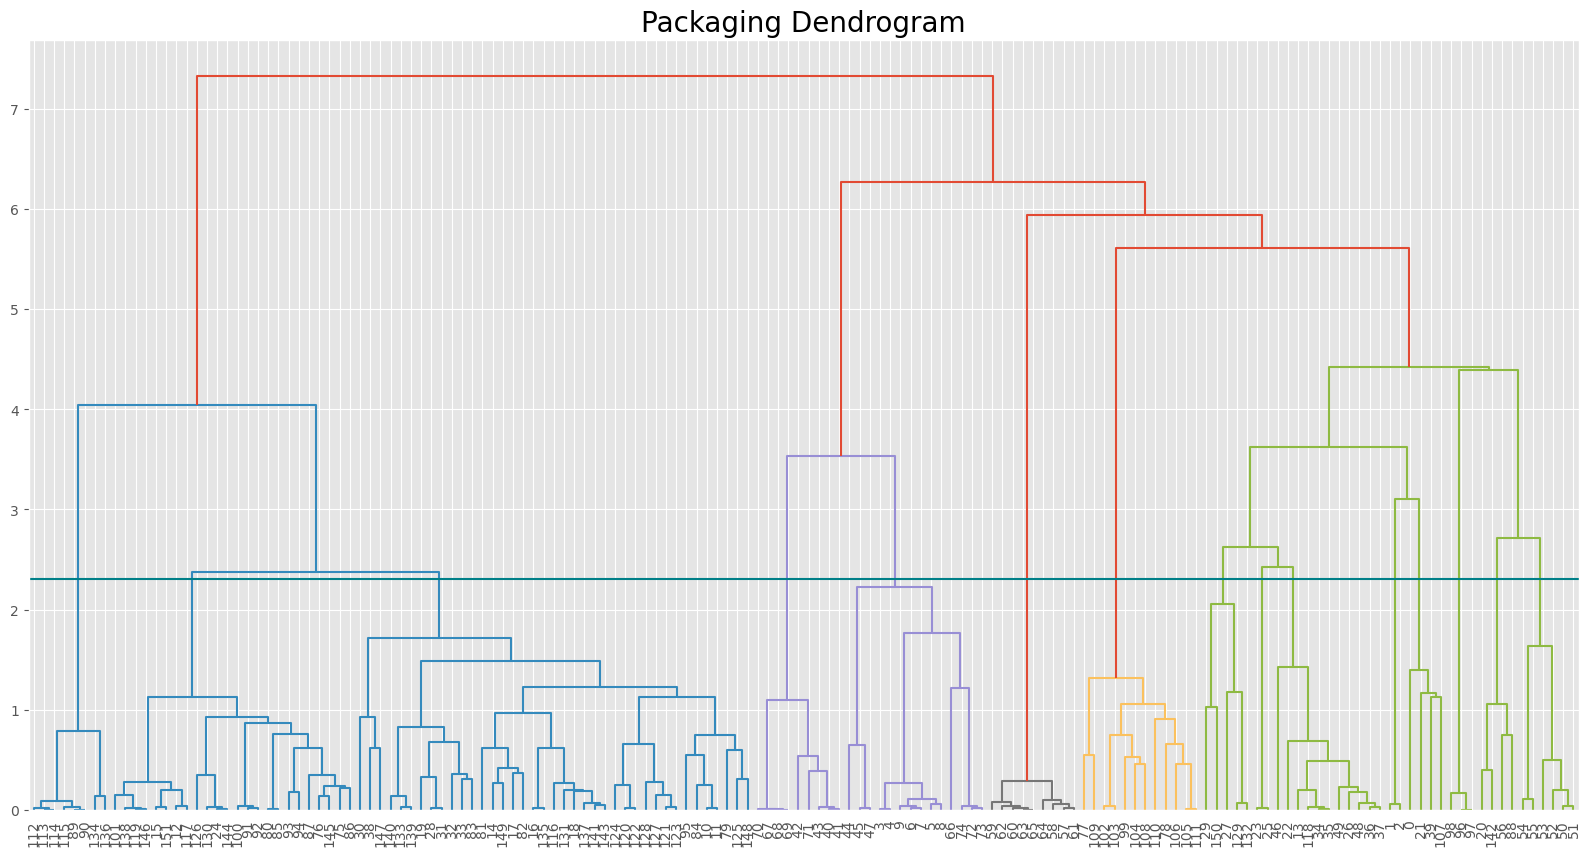


Silhouette score: 0.390030140637157

Group-to-cluster ratio : 89.97


,Cluster,Percentage
0,0,23.03
1,6,15.13
2,3,9.21
3,1,7.89
4,16,5.92
5,9,5.26
6,4,5.26
7,5,5.26
8,18,4.61
9,7,3.95


In [481]:
plt.figure(figsize=(20, 10))
plt.title("Packaging Dendrogram",fontsize=20)

# Dendogram for different method and metrics
selected_data = df.iloc[:,1:46]
clusters = shc.linkage(selected_data, 
            method='ward', 
            metric="euclidean")

shc.dendrogram(Z=clusters)
plt.tick_params(labelsize=10)
plt.axhline(y = 2.3, color = "#007f88", linestyle = 'solid')
plt.show()

cluster = AgglomerativeClustering(n_clusters=20, affinity='euclidean', linkage='ward')
cluster.fit(X)
cluster.labels_
cluster_num = cluster.labels_
df.loc[:,"y_hc_ward"]=cluster_num
df.to_excel('df_kmeans.xlsx', index=False)

# Calculate silhouette_score to make comparissons
score_HC = silhouette_score(X, df.y_hc_ward, metric='euclidean')
print("\nSilhouette score:", score_HC)


# Accuracy 
Accura= acc1(df,'GroupJanTorsten','y_hc_ward')
print("\nGroup-to-cluster ratio :", Accura)

# Percentage by cluster
group_and_percentage(df['y_hc_ward'],df['GroupJanTorsten'])

# Hierarchical Tree Clustering (Complete)

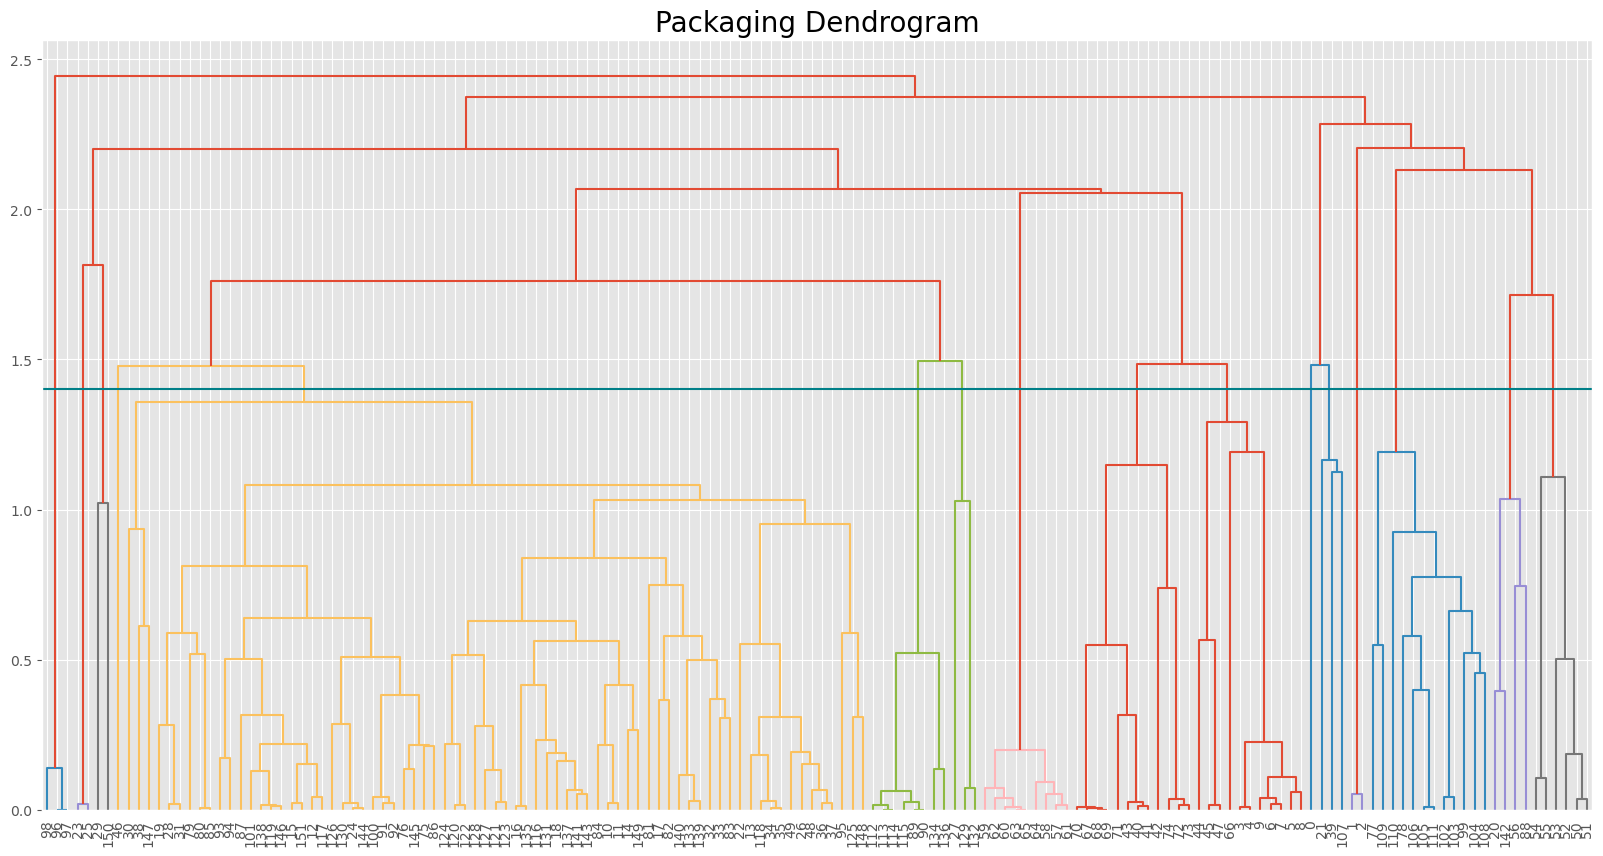


Silhouette score: 0.24414209583348045

Group-to-cluster ratio : 90.85


,Cluster,Percentage
0,3,34.87
1,0,25.66
2,2,12.50
3,1,7.89
4,6,5.92
5,4,2.63
6,7,1.97
7,5,1.32
8,8,1.32
9,14,1.32


In [482]:
plt.figure(figsize=(20, 10))
plt.title("Packaging Dendrogram",fontsize=20)

# Dendogram for different method and metrics
selected_data = df.iloc[:,1:46]
clusters = shc.linkage(selected_data, 
            method='complete', 
            metric="euclidean")

shc.dendrogram(Z=clusters)
plt.tick_params(labelsize=10)
plt.axhline(y = 1.4, color = "#007f88", linestyle = 'solid')
plt.show()

cluster = AgglomerativeClustering(n_clusters=16, affinity='euclidean', linkage='complete')
cluster.fit(X)
cluster.labels_
cluster_num = cluster.labels_
df.loc[:,"y_hc_com"]=cluster_num
df.to_excel('df_kmeans.xlsx', index=False)

# Calculate silhouette_score to make comparissons
score_HC = silhouette_score(X, df.y_hc_com, metric='euclidean')
print("\nSilhouette score:", score_HC)


# Accuracy 
Accura = acc1(df,'GroupJanTorsten','y_hc_com')
print("\nGroup-to-cluster ratio :", Accura)
# Percentage by cluster
group_and_percentage(df['y_hc_com'],df['GroupJanTorsten'])

# Hierarchical Tree Clustering (Single)

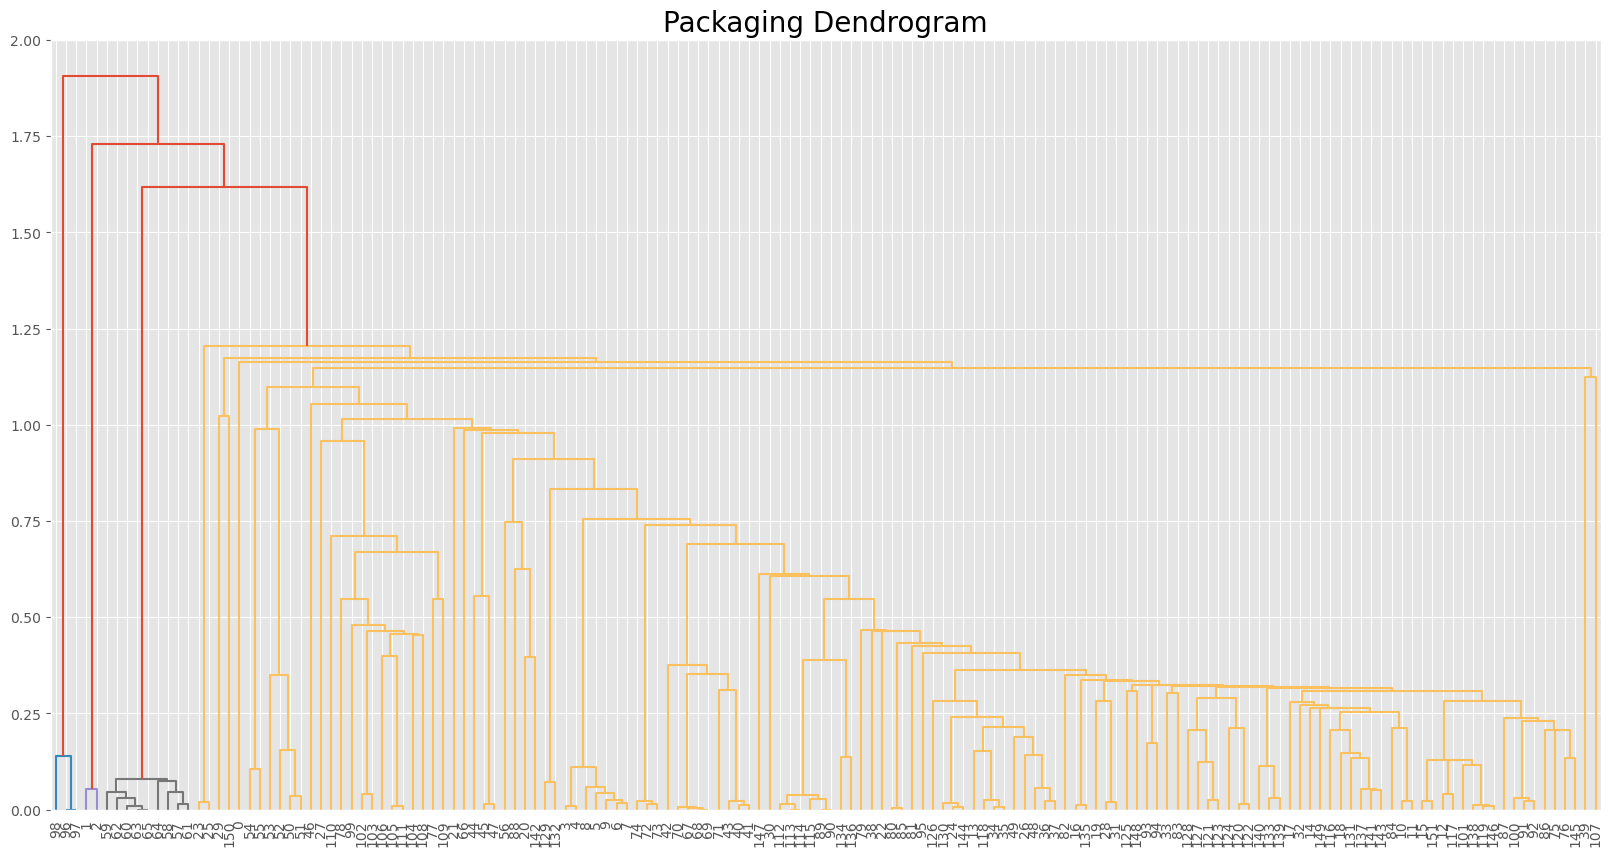


Silhouette score: 0.28908639832080235

Group-to-cluster ratio : 90.85


,Cluster,Percentage
0,0,79.61
1,10,5.92
2,2,1.97
3,1,1.97
4,6,1.97
5,3,1.32
6,8,1.32
7,4,1.32
8,13,0.66
9,9,0.66


In [483]:
plt.figure(figsize=(20, 10))
plt.title("Packaging Dendrogram",fontsize=20)

# Dendogram for different method and metrics
selected_data = df.iloc[:,1:46]
clusters = shc.linkage(selected_data, 
            method='single', 
            metric="euclidean")

shc.dendrogram(Z=clusters)
plt.tick_params(labelsize=10)
#plt.axhline(y = 1.5, color = "#007f88", linestyle = 'solid')
plt.show()

cluster = AgglomerativeClustering(n_clusters=15, affinity='euclidean', linkage='single')
cluster.fit(X)
cluster.labels_
cluster_num = cluster.labels_
df.loc[:,"y_hc_sgl"]=cluster_num
df.to_excel('df_kmeans.xlsx', index=False)

# Calculate silhouette_score to make comparissons
score_HC = silhouette_score(X, df.y_hc_sgl, metric='euclidean')
print("\nSilhouette score:", score_HC)


# Accuracy 
Acura= acc1(df,'GroupJanTorsten','y_hc_sgl')
print("\nGroup-to-cluster ratio :", Accura)

# Percentage by cluster
group_and_percentage(df['y_hc_sgl'],df['GroupJanTorsten'])

# Hierarchical Tree Clustering (Avg)

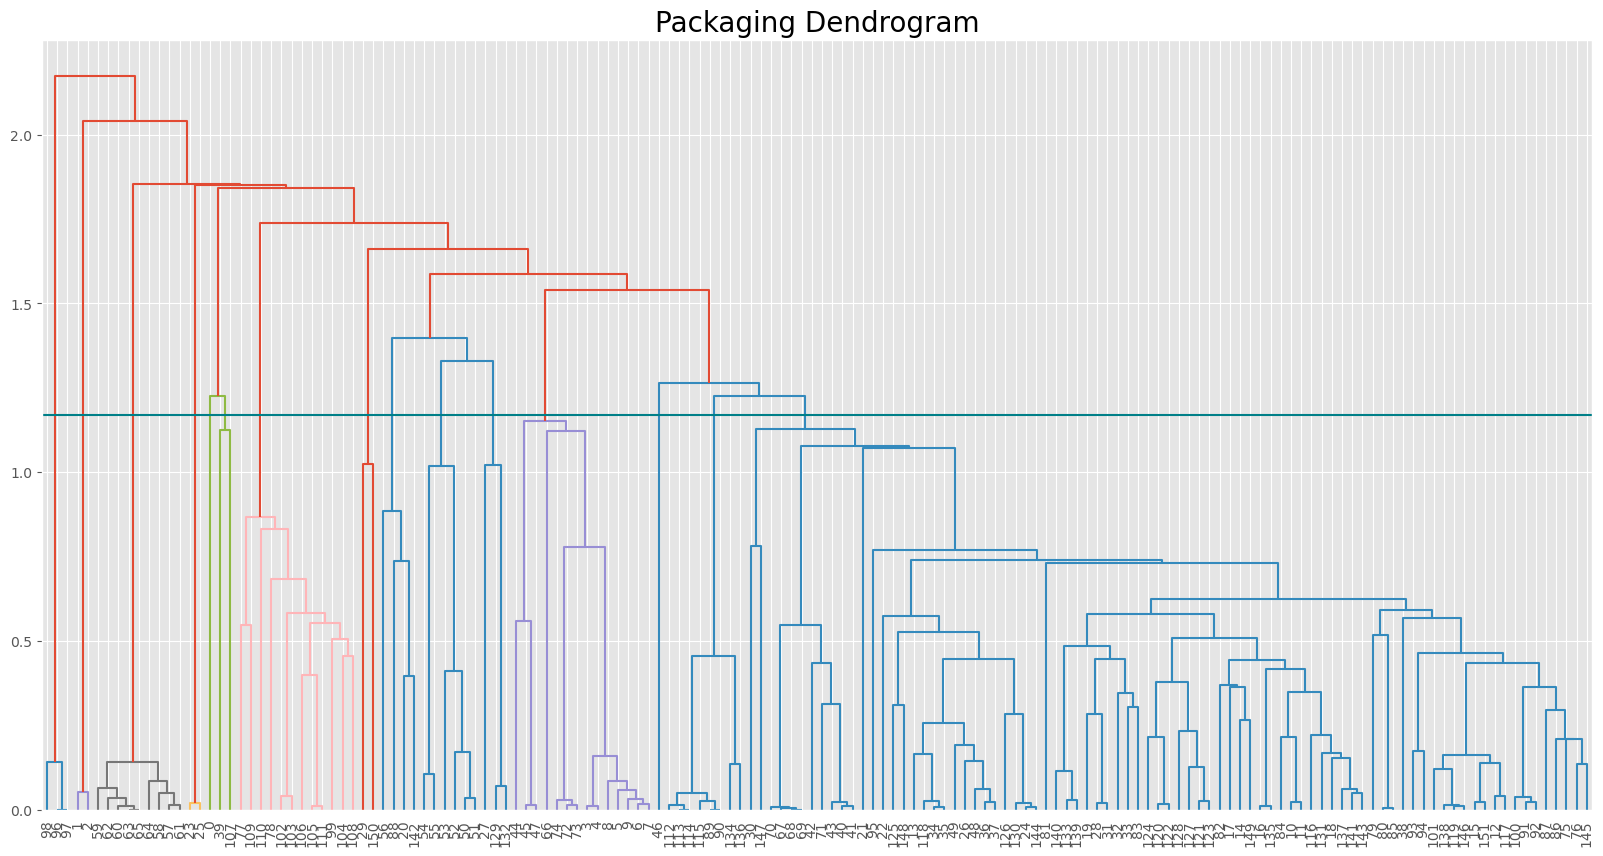


Silhouette score: 0.2517841723130758

Group-to-cluster ratio : 96.53


,Cluster,Percentage
0,0,78.29
1,5,5.92
2,1,2.63
3,2,1.97
4,10,1.97
5,8,1.32
6,9,1.32
7,3,1.32
8,4,1.32
9,11,0.66


In [484]:
plt.figure(figsize=(20, 10))
plt.title("Packaging Dendrogram",fontsize=20)

# Dendogram for different method and metrics
selected_data = df.iloc[:,1:46]
clusters = shc.linkage(selected_data, 
            method='average', 
            metric="euclidean")

shc.dendrogram(Z=clusters)
plt.tick_params(labelsize=10)
plt.axhline(y = 1.17, color = "#007f88", linestyle = 'solid')
plt.show()

cluster = AgglomerativeClustering(n_clusters=15, affinity='euclidean', linkage='average')
cluster.fit(X)
cluster.labels_
cluster_num = cluster.labels_
df.loc[:,"y_hc_avg"]=cluster_num
df.to_excel('df_kmeans2.xlsx', index=False)

# Calculate silhouette_score to make comparissons
score_HC = silhouette_score(X, df.y_hc_avg, metric='euclidean')
print("\nSilhouette score:", score_HC)

# Accuracy 
Accura = acc1(df,'GroupJanTorsten','y_hc_avg')
print("\nGroup-to-cluster ratio :", Accura)

# Percentage by cluster
group_and_percentage(df['y_hc_avg'],df['GroupJanTorsten'])

In [485]:
table1 = df[['GroupJanTorsten','y_kmeans']]
table2 = df[['GroupJanTorsten','y_kmeans++']]
table3 = df[['GroupJanTorsten','y_hc_ward']]
table4 = df[['GroupJanTorsten','y_hc_com']]
table5 = df[['GroupJanTorsten','y_hc_sgl']]
table6 = df[['GroupJanTorsten','y_hc_avg']]
			
evaluate(table1)
evaluate(table2)
evaluate(table3)
evaluate(table4)
evaluate(table5)
evaluate(table6)

Number of right classifications is 119.0 from 152, in percent 0.7828947368421053
Number of right classifications is 117.0 from 152, in percent 0.7697368421052632
Number of right classifications is 121.0 from 152, in percent 0.7960526315789473
Number of right classifications is 124.0 from 152, in percent 0.8157894736842105
Number of right classifications is 142.0 from 152, in percent 0.9342105263157895
Number of right classifications is 141.0 from 152, in percent 0.9276315789473684


In [487]:
data = {'Algorithm': ['K_means', 'K-means++','H_Ward','H_Compl','H_Single','H_Avg'],
        'Group-to-K': ['90.36%', '89.75%', '89.97%', '90.85%', '90.85%', '96.53%'],
        'Purity Score': ['78.97%', '78.94%', '79.60%', '81.57%', '93.42%', '92.76%'],
        'Clusters': [16, 18, 20, 16, 15, 15],
        '1st_K': ['23.68%', '21.71%', '23.03%', '34.87%', '79.61%', '78.29%'],
        '2nd_k': ['21.71%', '21.71%', '15.13%', '25.66%', '5.92%', '5.92%']}
summary = pd.DataFrame(data)

# create a style object to highlight the 3rd row and center
stl = summary.style.apply(lambda x: ['background-color: #00cfcc' if x.name == 2 else '' for i in x], axis=1).set_properties(**{'text-align': 'center'})


# display the styled DataFrame
display(stl)

,Algorithm,Group-to-K,Purity Score,Clusters,1st_K,2nd_k
0,K_means,90.36%,78.97%,16,23.68%,21.71%
1,K-means++,89.75%,78.94%,18,21.71%,21.71%
2,H_Ward,89.97%,79.60%,20,23.03%,15.13%
3,H_Compl,90.85%,81.57%,16,34.87%,25.66%
4,H_Single,90.85%,93.42%,15,79.61%,5.92%
5,H_Avg,96.53%,92.76%,15,78.29%,5.92%
